This notebook contains various examples of fitting curves to data.
- scipy.stats.linregress
- numpy.polyfit
- scipy.optimize.curve_fit

Date Created: 23 Sep 2017
<br>
Last Modified: 25 Sep 2017
<br>
Humans Responsible: The Prickly Pythons

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# scipy.stats.linregress

Official documentation: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html
- Fits data to straight line.
- Returns r^2 value of the fit and other measures of regression goodness.

In [2]:
# Generate some synthetic data
x = np.arange(0,10)
y = x + np.random.rand(10)*3.

In [3]:
import scipy.stats as stats

# Fit a straight line
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

print(slope, intercept)

0.951961094465 1.46806133242


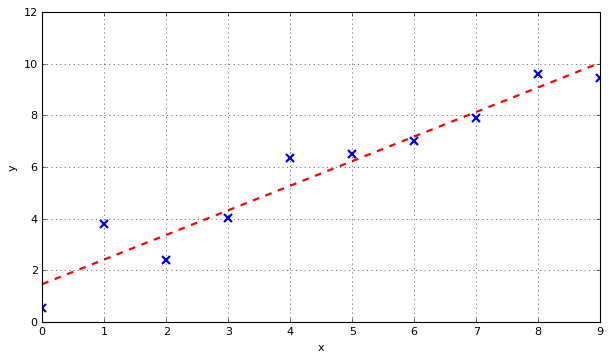

In [4]:
# Plot the data and the fitted function
fig = plt.figure(figsize=(9,5))
ax1 = fig.add_subplot(111)
ax1.plot(x, y, 'x', mew=2, ms=8, color='blue')
ax1.plot(x, x*slope+intercept, ls='--', color='red', lw=2)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.grid()
plt.show()

In [6]:
print('r^2: %.2f' % r_value)
print('p-value: %e' % p_value)

r^2: 0.96
p-value: 6.699066e-06


In [235]:
# this much of the variability has been accounted for 
# (see https://en.wikipedia.org/wiki/Coefficient_of_determination)

# numpy.polyfit
Official Documentation: https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.polyfit.html
- Fits data to polynoimals.
- Can handle fitting with error bars.
- Faster than scipy.optimize.curve_fit but can only fit for polynomials.

### - Fitting with error bars

In [338]:
# Generate some synthetic data
data_len = 10
x = np.linspace(0, 10, data_len)

# Errors in y
dy_std = 2*np.random.rand(data_len) + 1
dy = dy_std * np.random.randn(data_len) + 0

# This is our data
y = x + dy

In [339]:
# Do the fitting
coeff, *stats = np.polyfit(x, y, deg=1, w=1/dy_std, full=True)

# Fitted function
y_fit = coeff[0]*x + coeff[1]

print(coeff)
print(stats)

[ 0.96392483  0.25701669]
[array([ 6.69602364]), 2, array([ 1.37771774,  0.31920814]), 2.2204460492503131e-15]


In [340]:
# Compare with unweighted fit
coeff, *stats = np.polyfit(x, y, deg=1, full=True)

# Fitted function
y_fitUnweighted = coeff[0]*x + coeff[1]

print(coeff)
print(stats)

[ 0.86317912  0.85373178]
[array([ 24.94299341]), 2, array([ 1.35754456,  0.39632407]), 2.2204460492503131e-15]


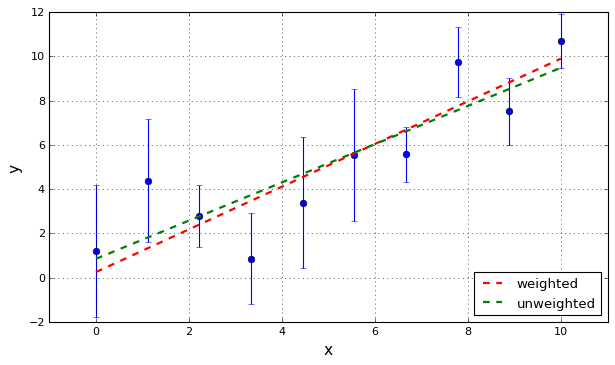

In [341]:
# Plot the data and the fitted function
fig = plt.figure(figsize=(9,5))
ax = fig.add_subplot(111)
ax.errorbar(x, y, yerr=dy_std, fmt='o')
ax.plot(x, y_fit, color='red', linestyle='dashed', linewidth=2, label='weighted')
ax.plot(x, y_fitUnweighted, color='green', linestyle='dashed', linewidth=2, label='unweighted')
ax.set_xlim(left=-1, right=11)
ax.grid()
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.legend(loc='lower right')
plt.show()

### - Fitting a polynomial with deg > 1

In [331]:
# Generate some synthetic data
data_len = 10
x = np.linspace(0, 10, data_len)

# This is our data
noise = (np.random.rand(data_len) - 0.5)*30
y = x**2 + 3*x - 1 + noise

In [332]:
coeff, *stats = np.polyfit(x, y, deg=2, full=True)
print(coeff)
print(stats)

y_fit = coeff[0]*x**2 + coeff[1]*x + coeff[2]

[ 1.44421691 -1.47958043  5.79940114]
[array([ 741.13280701]), 3, array([ 1.64219501,  0.53895301,  0.11280603]), 2.2204460492503131e-15]


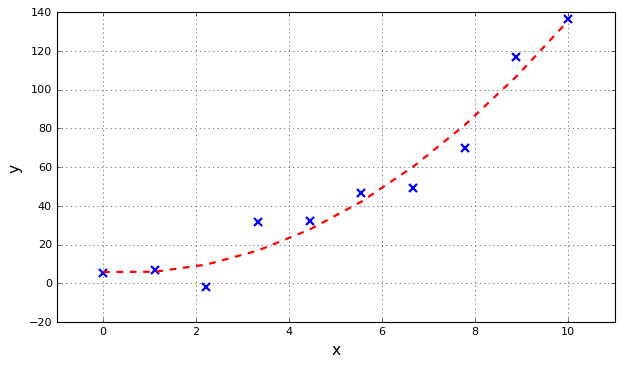

In [333]:
# Plot the data and the fitted function
fig = plt.figure(figsize=(9,5))
ax = fig.add_subplot(111)
ax.plot(x, y, 'x', mew=2, ms=8, color='blue')
ax.plot(x, y_fit, color='red', linestyle='dashed', linewidth=2, label='weighted')
ax.set_xlim(left=-1, right=11)
ax.grid()
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.show()

# scipy.optimize.curve_fit
Official Documentation: https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html
- General - Can fit data to any function.
- Iterative methods - may be slow and might not converge.

In [334]:
# Generate some synthetic data
sigma = 3
mu = 10
num_samples = 1000

s = sigma * np.random.randn(num_samples) + mu

In [335]:
# Make a histogram
num_bin = 20
hist, bin_edges = np.histogram(s, bins=num_bin)

bin_center = (bin_edges[:-1] + bin_edges[1:]) / 2

x = bin_center
y = hist
print(x)
print(y)

[  1.3406247    2.24890573   3.15718677   4.0654678    4.97374884
   5.88202987   6.79031091   7.69859194   8.60687298   9.51515401
  10.42343505  11.33171608  12.23999712  13.14827815  14.05655919
  14.96484022  15.87312126  16.78140229  17.68968333  18.59796436]
[  3   4  11  16  29  48  72  84 109 116 114 101 103  75  39  34  27   8
   4   3]


In [336]:
from scipy.optimize import curve_fit

# Define a Gaussian function
def func(x, A, mu, sigma):
    return A * np.exp(-(x-mu)**2/(2*sigma**2))

# Supply an intial guess.
# Parameter A should be close to the maximum of the data
# Parameter mu should be close to the mean of the data
# Parameter sigma should be close to the standard deviation of the data
initial_guess = [np.max(y), np.mean(y), np.std(y)]

# Do the fitting
p_opt, p_cov = curve_fit(func, x, y, p0=initial_guess, maxfev=1000)

print(p_opt)
print(p_cov)

[ 117.66131825   10.04792926   -3.09409683]
[[  6.76258397e+00  -2.40882312e-05   1.18937824e-01]
 [ -2.40882312e-05   6.23029775e-03  -1.43970548e-06]
 [  1.18937824e-01  -1.43970548e-06   6.25875606e-03]]


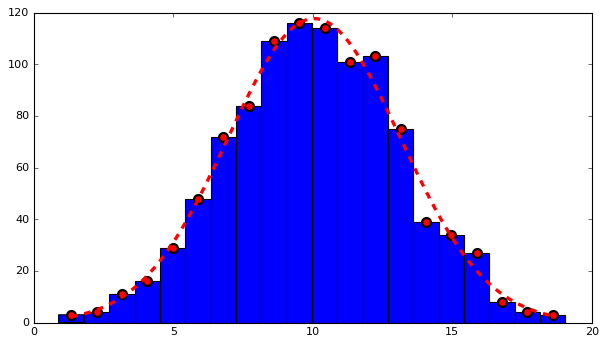

In [337]:
# Plot the results
x_plot = np.arange(np.min(x),np.max(x),0.1)

fig = plt.figure(figsize=(9,5))
ax = fig.add_subplot(111)
ax.hist(s, bins=num_bin)
ax.plot(x, y, 'o', mew=2, markersize=8, color='red')
ax.plot(x_plot, func(x_plot, *p_opt), linewidth=3, color='red', linestyle='dashed')
plt.show()